In [22]:
#Setting up
%pip -q install pycaret skimpy numpy


Note: you may need to restart the kernel to use updated packages.


In [1]:
# preparing
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimpy as sk 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from pycaret.classification import *


# Load data
df = sns.load_dataset('titanic')

sk.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 891    │ │ string      │ 5     │ │ class                 │                                │
│ │ Number of columns │ 15     │ │ int32       │ 4     │ │ deck                  │                                │
│ └───────────────────┴────────┘ │ float64     │ 2     │ └───────────────────────┘                                │
│                                │ category    │ 2     │                                                          │
│                                │ bool        │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA    ┃ NA %    ┃ mean     ┃ sd       ┃ p0    ┃ p25     ┃ p50    ┃ p75  ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ survived       │     0 │       0 │   0.3838 │   0.4866 │     0 │       0 │      0 │    1 │      1 │ ▇    ▅ │  │
│ │ pclass         │     0 │       0 │    2.309 │   0.8361 │     1 │       2 │      3 │    3 │      3 │ ▃  ▃ ▇ │  │
│ │ age            │   177 │   19.87 │     29.7 │    14.53 │  0.42 │   20.12 │     28 │   38 │     80 │ ▂▇▇▃▁  │  │
│ │ sibsp          │     0 │       0 │    0.523 │    1.103 │     0 │       0 │      0 │    1 │      8 │   ▇    │  │
│ │ parch          │     0 │       0 │   0.3816 │   0.8061 │     0 │       0 │      0 │    0 │      6 │  ▇▁▁   │  │
│ │ fare           │     0 │       0 │     32.2 │    49.69 │     0 │    7.91 │  14.45 │   31 │  512.3 │   ▇    │  │
│ └────────────────┴───────┴─────────┴──────────┴──────────┴───────┴─────────┴────────┴──────┴────────┴────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                     ┃ NA          ┃ NA %            ┃ ordered              ┃ unique            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩  │
│ │ class                           │           0 │               0 │ False                │                 3 │  │
│ │ deck                            │         688 │           77.22 │ False                │                 8 │  │
│ └─────────────────────────────────┴─────────────┴─────────────────┴──────────────────────┴───────────────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ true            ┃ true rate                     ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ adult_male                         │             537 │                           0.6 │       ▅    ▇        │  │
│ │ alone                              │             537

In [2]:
# Check for missing values
print(df.info())
df.T.apply(lambda x: x.unique(), axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


survived                                                  [0, 1]
pclass                                                 [3, 1, 2]
sex                                               [male, female]
age            [22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,...
sibsp                                      [1, 0, 3, 4, 2, 5, 8]
parch                                      [0, 1, 2, 5, 3, 4, 6]
fare           [7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....
embarked                                          [S, C, Q, nan]
class                                     [Third, First, Second]
who                                          [man, woman, child]
adult_male                                         [True, False]
deck                                  [nan, C, E, G, D, A, B, F]
embark_town            [Southampton, Cherbourg, Queenstown, nan]
alive                                                  [no, yes]
alone                                              [False, True]
dtype: object

In [3]:
#   #Imputer        #Use Case               #Encoding   #Type               #Strategy
#   SimpleImputer   Numerical missing       values      No encoding         Mean, median, most frequent, constant
#   KNNImputer      Numerical missing       values      No encoding         Mean or median of nearest neighbors
#   OrdinalEncoder  Ordinal categorical     variables	Ordinal encoding	Integer values based on order
#   OneHotEncoder   Nominal categorical     variables	One-hot encoding	Binary features
#   LabelEncoder    Nominal categorical     variables   Label encoding      Unique integer values


# Define the transformer step
numeric_features = ['age', 'fare']
categorical_features = ['sex', 'embarked', 'embark_town', 'class','who','alive']

numeric_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [4]:
# Create a pipeline for Logistic Regression
logist = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=5)),
    ('classifier', LogisticRegression())
])

# Hyperparameter grid for Logistic Regression
logist_params = {
    'preprocessor__num__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['constant', 'most_frequent'],
    'classifier__penalty': ['l2'],
    'classifier__C': [0.1, 1, 10]
}


In [5]:
# Drop unnecessary columns
df = df.drop(['deck'], axis=1)

# Split data into training and testing sets
X = df.drop('survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Grid search for Logistic Regression
logreg_grid_search = GridSearchCV(logist, logist_params, cv=5)
logreg_grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(strategy='median'),
                                                                         ['age',
                                                                          'fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['sex',
                                                                          'embarked',
                                                                          'embark_town',
                                                                          'class',
                                                                          'who',
                                                                          'alive'])])),
                                       ('pca', PCA(n_components=5)),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__penalty': ['l2'],
                         'preprocessor__cat__imputer__strategy': ['constant',
                                                                  'most_frequent'],
                         'preprocessor__num__strategy': ['mean', 'median']})

In [7]:
# Create a pipeline for Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('preprocessing', PCA(n_components=5)),
    ('clf', RandomForestClassifier())
])

# Hyperparameter grid for Random Forest
rf_params = {
    'preprocessor__num__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['constant', 'most_frequent'],
    'clf__n_estimators': [100, 200, 300],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_depth': [None, 5, 10]
}

# Randomized search for Random Forest
rf_random_search = RandomizedSearchCV(rf_pipeline, rf_params, n_iter=10, cv=5)
rf_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               SimpleImputer(strategy='median'),
                                                                               ['age',
                                                                                'fare']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(fill_value='missing',
                                                                                                              strategy='constant')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['sex',
                                                                                'embarked',
                                                                                'embark_town',
                                                                                'class',
                                                                                'who',
                                                                                'alive'])])),
                                             ('preprocessing',
                                              PCA(n_components=5)),
                                             ('clf',
                                              RandomForestClassifier())]),
                   param_distributions={'clf__max_depth': [None, 5, 10],
                                        'clf__min_samples_leaf': [1, 2, 4],
                                        'clf__min_samples_split': [2, 5, 10],
                                        'clf__n_estimators': [100, 200, 300],
                                        'preprocessor__cat__imputer__strategy': ['constant',
                                                                                 'most_frequent'],
                                        'preprocessor__num__strategy': ['mean',
                                                                        'median']})

In [8]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("X_train:", X_train.head())
print("y_train:", y_train.head())

Shape of X_train: (712, 13)
Shape of y_train: (712,)
X_train:      pclass     sex   age  sibsp  parch     fare embarked   class    who  \
331       1    male  45.5      0      0  28.5000        S   First    man   
733       2    male  23.0      0      0  13.0000        S  Second    man   
382       3    male  32.0      0      0   7.9250        S   Third    man   
704       3    male  26.0      1      0   7.8542        S   Third    man   
813       3  female   6.0      4      2  31.2750        S   Third  child   

     adult_male  embark_town alive  alone  
331        True  Southampton    no   True  
733        True  Southampton    no   True  
382        True  Southampton    no   True  
704        True  Southampton    no  False  
813       False  Southampton    no  False  
y_train: 331    0
733    0
382    0
704    0
813    0
Name: survived, dtype: int64


Text(0.5, 1.0, 'Feature Importance')

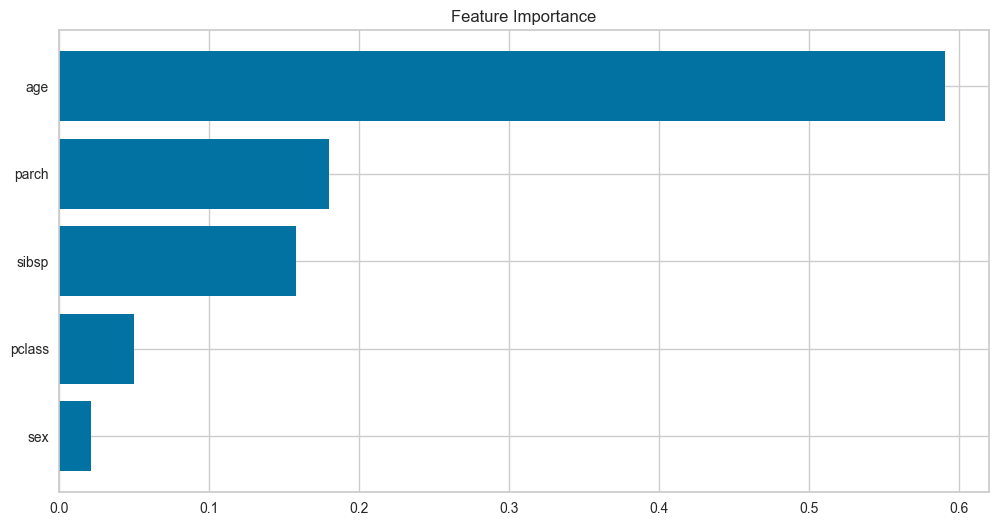

In [9]:
# Fit the rf_pipeline visualize feature importance
rf_pipeline.fit(X_train, y_train)

# Access the feature importances
feature_importances = rf_pipeline.named_steps['clf'].feature_importances_

sorted_idx = np.argsort(feature_importances)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [10]:
# Print best parameters and best score for RandomForestClassifier
print("Best Parameters (RF): ", rf_random_search.best_params_)
print("Best Score (RF): ", rf_random_search.best_score_)

# Print best parameters and best score for LogisticRegression
print("Best Parameters (LogReg): ", logreg_grid_search.best_params_)
print("Best Score (LogReg): ", logreg_grid_search.best_score_)

Best Parameters (RF):  {'preprocessor__num__strategy': 'mean', 'preprocessor__cat__imputer__strategy': 'constant', 'clf__n_estimators': 100, 'clf__min_samples_split': 5, 'clf__min_samples_leaf': 1, 'clf__max_depth': 10}
Best Score (RF):  0.9803703338914606
Best Parameters (LogReg):  {'classifier__C': 1, 'classifier__penalty': 'l2', 'preprocessor__cat__imputer__strategy': 'constant', 'preprocessor__num__strategy': 'mean'}
Best Score (LogReg):  0.9480744607505172


In [11]:
# Define the age ranges
age_ranges = [(18, 24), (25, 44), (45, 64), (65, 100)]

# Create separate datasets for each age range
for age_range in age_ranges:
    min_age, max_age = age_range
    age_df = df[(df['age'] >= min_age) & (df['age'] <= max_age)]


In [12]:
# Evaluate the model on the testing data
y_pred = rf_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Age range: {age_range}, Accuracy: {accuracy:.3f}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Age range: (65, 100), Accuracy: 0.978
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.95      1.00      0.97        74

    accuracy                           0.98       179
   macro avg       0.97      0.98      0.98       179
weighted avg       0.98      0.98      0.98       179

[[101   4]
 [  0  74]]
